    R&D Spend  Administration  Marketing Spend     Profit
0   165349.20       136897.80        471784.10  192261.83
1   162597.70       151377.59        443898.53  191792.06
2   153441.51       101145.55        407934.54  191050.39
3   144372.41       118671.85        383199.62  182901.99
4   142107.34        91391.77        366168.42  166187.94
5   131876.90        99814.71        362861.36  156991.12
6   134615.46       147198.87        127716.82  156122.51
7   130298.13       145530.06        323876.68  155752.60
8   120542.52       148718.95        311613.29  152211.77
9   123334.88       108679.17        304981.62  149759.96
10  101913.08       110594.11        229160.95  146121.95
11  100671.96        91790.61        249744.55  144259.40
12   93863.75       127320.38        249839.44  141585.52
13   91992.39       135495.07        252664.93  134307.35
14  119943.24       156547.42        256512.92  132602.65
15  114523.61       122616.84        261776.23  129917.04
16   78013.11 

Text(0, 0.5, 'predicted')

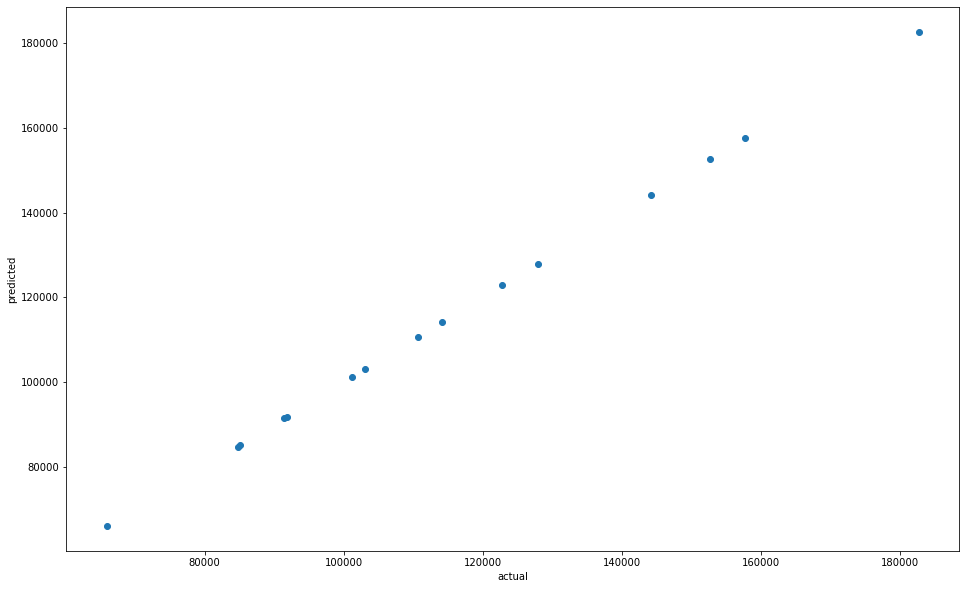

In [5]:
#using panda version 1.4.2

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn import tree, model_selection
import matplotlib.pyplot as plt

df=pd.read_csv('50_Startups.csv')
print(df)

x=df.iloc[:,0:].values
print(x)
y=df.iloc[:,1].values
print(y)
x_train,x_test,y_train,y_test=\
train_test_split(x,y,
                test_size=0.3,
                random_state=0)
print("splitting the values in train and test set ","\nx train",x_train,"\nx_test",x_test,"y_train",y_train,"\ny_test",y_test)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(x_train)
X_test_std = stdsc.transform(x_test)
print(X_test_std,"\n second \n", X_train_std)

ler = LinearRegression()
ler.fit(x_train,y_train)
y_pred = ler.predict(x_test)
print(y_pred)
testing_data_model_score = ler.score(x_test, y_test)
kfold = model_selection.KFold(n_splits=10)
print("Model Score/Performance on Testing data",testing_data_model_score)
scoring = "neg_mean_squared_error"
results = model_selection.cross_val_score(ler, x_train, y_train, cv=kfold, scoring=scoring)
print("Mean Squared Error: ", results.mean())
print("Standard Deviation: ", results.std())

seed=42
kfold = model_selection.KFold(n_splits=10)
model = tree.DecisionTreeRegressor()
scoring = "neg_mean_absolute_error"
results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
print("Mean Absolute Error: ", results.mean())
print("Standard Deviation: ", results.std())

training_data_model_score = ler.score(x_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)
df = pd.DataFrame(data={'Predicted value':y_pred.flatten(),'Actual Value':y_test.flatten()})
print("df",df)
ler.predict([[165349.20,136897.80,471784.10,192261.83]])
r2_score(y_test , y_pred)
plt.figure(figsize= (16,10))
plt.scatter(y_test , y_pred)
plt.xlabel("actual")
plt.ylabel("predicted")


